<a href="https://colab.research.google.com/github/kritikaamohan/kritikaamohan/blob/main/musicprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Spotify_data.csv')
print(df.head())

In [ ]:
display(df.head())

In [82]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
display(df.head())

In [ ]:
df.info()

In [ ]:
print(df.columns)

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [88]:
df.duplicated().sum()

np.int64(15)

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
features= ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']

In [ ]:
for feature in features:
  plt.figure(figsize=(10,5))
  sns.scatterplot(data= df, x=feature, y='Popularity')
  plt.title(f'Popularity Vs {feature}')
  plt.show()

In [92]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_data = df[numeric_columns]
#Pick only the columns that have numeric data — either integers (whole numbers) or floats (decimal numbers)

In [93]:
corr_matrix = numeric_data.corr() #Correlation between all the features

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [95]:
#popularity has a moderate positive correlation with loudness (0.31) and danceability (0.25), indicating that louder and more danceable tracks tend to be more popular.
#There is a moderate negative correlation between popularity and acousticness (-0.43), suggesting that tracks with higher acousticness are generally less popular.
#Energy also has a positive correlation with popularity (0.25).

In [ ]:
#Distribution of all the features
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [97]:
#Feature Selection : Energy ,Valence, Danceability, Loudness ,Acousticness ,Tempo ,Speechiness, Liveness
#These features capture various audio characteristics that influence the popularity of music tracks.

In [127]:
#Model Training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [99]:
#Selecting features and the target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
X= df[features]
y= df['Popularity']

In [100]:
#Split data into two ; training = 80% to teach the model & testing = 20% to check if it learned well
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
#Normalizing all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
#Parameter grid of the Random Forest
param_grid = {
    'n_estimators': [50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [121]:
# Grid search with 5-fold CV
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,verbose=2, refit= True, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

# Get best model and predict
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

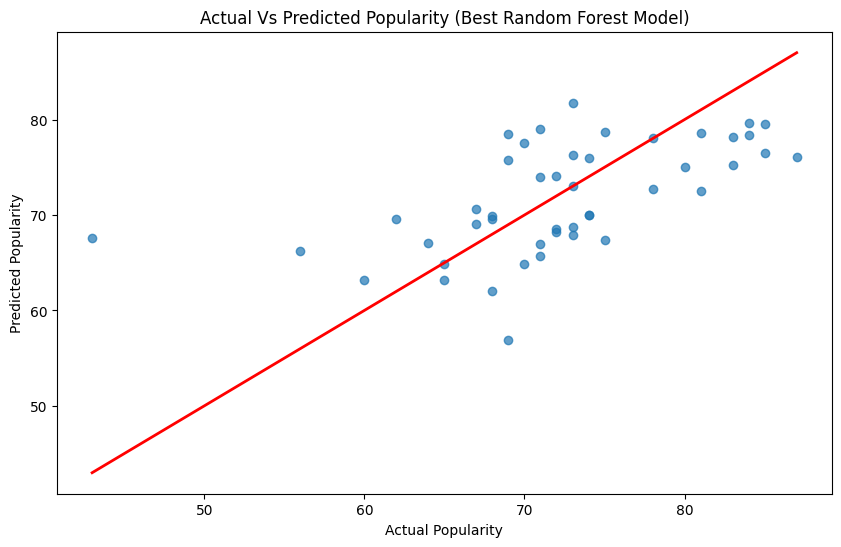

In [124]:
# making predictions
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual Vs Predicted Popularity (Best Random Forest Model)')
plt.show()